In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

T_MAX = 300
N_LAPS = 49

## MCTS Planners return distribution

In [3]:

ol_uct_offline_scores_100k = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-11-12_16-17-19/results.npy")
ol_uct_offline_scores_10k = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-11-12_10-24-54/results.npy")
ol_uct_offline_scores_50k = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-11-13_11-32-52/results.npy")

ol_uct_offline_scores_50k_new = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-11-14_10-19-14/results.npy")
ol_uct_offline_scores_50k_am = np.load("/mnt/c/Users/Diego/Desktop/Logs/50000/1604659496.734427/1604773622.5647175/results.npy")

# ol_uct_offline_scores_1 = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-11-03_09-47-13/results.npy")
# ol_uct_offline_scores_2 = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-11-04_17-27-59/results.npy")
# ol_uct_offline_scores_3 = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-11-03_09-47-26/results.npy")
#ol_uct_offline_scores_4 = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-10-30_15-44/results.npy")

true_strategy_scores = np.load("../data/RaceStrategy-v2/human_policy/results_unnorm_aus.npy")
default_strategy_scores = np.load("../data/RaceStrategy-v2/default_policy/results_unnorm_aus.npy")

no_pit_100b = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-11-20_16-45-39/numpy_dumps/results.npy")
no_pit_50k = np.load("/mnt/c/Users/Diego/Desktop/Logs/2020-11-18_13-28-16/numpy_dumps/results.npy")
no_pit_100k = np.load("/mnt/c/Users/Diego/Desktop/Logs/2020-11-19_17-22-10/numpy_dumps/results.npy")
double_rollout_100k = np.load("/mnt/c/Users/Diego/Desktop/Logs/2020-11-22_10-20-54/numpy_dumps/results.npy")

q_learning_10k_01_06_100 = np.load("/mnt/c/Users/Diego/Desktop/Logs/Q-learning_10k_06q_01alpha_100e/numpy_dumps/results.npy")
q_learning_10k_01_def_20 = np.load("../logs/RaceStrategy-v2/q_learning_ol_uct/2020-12-05_11-10-24/numpy_dumps/results.npy")
q_learning_10k_01_def_80 = np.load("../logs/RaceStrategy-v2/q_learning_ol_uct/2020-12-05_12-49-13/numpy_dumps/results.npy")

q_learning_10k_01_def_r_100 = np.load("/mnt/c/Users/Diego/Desktop/Logs/2020-12-06_16-30-13/numpy_dumps/results.npy")

In [4]:
q_learning_10k_01_def_100 = np.concatenate([q_learning_10k_01_def_20, q_learning_10k_01_def_80])

In [5]:
ql_ucth = np.load("/mnt/c/Users/Diego/Desktop/Logs/QL_uct_h/numpy_dumps/results.npy")
print(np.mean(ql_ucth), "+-", np.std(ql_ucth))

unnorm = T_MAX * (N_LAPS - ql_ucth)
print(np.mean(unnorm), "+-", np.std(unnorm))

34.010476099979414 +- 0.023528031020488838
4496.857170006176 +- 7.0584093061466815


In [6]:
true_sampled = np.random.choice(true_strategy_scores.squeeze(), 100, replace=True)
#true_sampled = true_strategy_scores.squeeze()
test_50k = np.hstack([ol_uct_offline_scores_50k_am, ol_uct_offline_scores_50k_new])

results = np.hstack([no_pit_100b.squeeze(), 
no_pit_50k.squeeze(), 
no_pit_100k.squeeze(), 
double_rollout_100k.squeeze(), 
ol_uct_offline_scores_10k.squeeze(), 
test_50k, 
ol_uct_offline_scores_100k.squeeze(), 
q_learning_10k_01_06_100.squeeze(),
q_learning_10k_01_def_100.squeeze(),
q_learning_10k_01_def_r_100.squeeze(),
true_sampled, 
default_strategy_scores.squeeze()])

labels = ["100 V,D,0,n"] * len(no_pit_100b)
labels.extend(["50k V,D,0,n"] * len(no_pit_50k))
labels.extend(["100k V,D,0,n"] * len(no_pit_100k))
labels.extend(["100k V,D,n,dr"] * len(double_rollout_100k))
labels.extend(["10k V,Q"] * len(ol_uct_offline_scores_10k))
labels.extend(["50k V,Q"] * len(test_50k))
labels.extend(["100k V,Q"] * len(ol_uct_offline_scores_100k))
labels.extend(["10k QL, alpha 0.1"] * len(q_learning_10k_01_06_100))
labels.extend(["10k QL, alpha 0.1, pirelli"] * len(q_learning_10k_01_def_100))
labels.extend(["10k QL, alpha 0.1, pirelli random"] * len(q_learning_10k_01_def_r_100))


labels.extend(["True"] * len(true_sampled))
labels.extend(["Default"] * len(default_strategy_scores))

sets = ["1"] * len(no_pit_100b)
sets.extend(["1"] * len(no_pit_50k))
sets.extend(["1"] * len(no_pit_100k))
sets.extend(["2"] * len(double_rollout_100k))
sets.extend(["3"] * len(ol_uct_offline_scores_10k))
sets.extend(["3"] * len(test_50k))
sets.extend(["3"] * len(ol_uct_offline_scores_100k))
sets.extend(["Q-Learning"] * len(q_learning_10k_01_06_100))
sets.extend(["Q-Learning"] * len(q_learning_10k_01_def_100))
sets.extend(["Q-Learning"] * len(q_learning_10k_01_def_r_100))

sets.extend(["Baseline"] * len(true_sampled))
sets.extend(["Baseline"] * len(default_strategy_scores))

print(len(labels), len(results), len(sets))

df = pd.DataFrame({"planner": labels, "return":results, "set": sets})

920 920 920


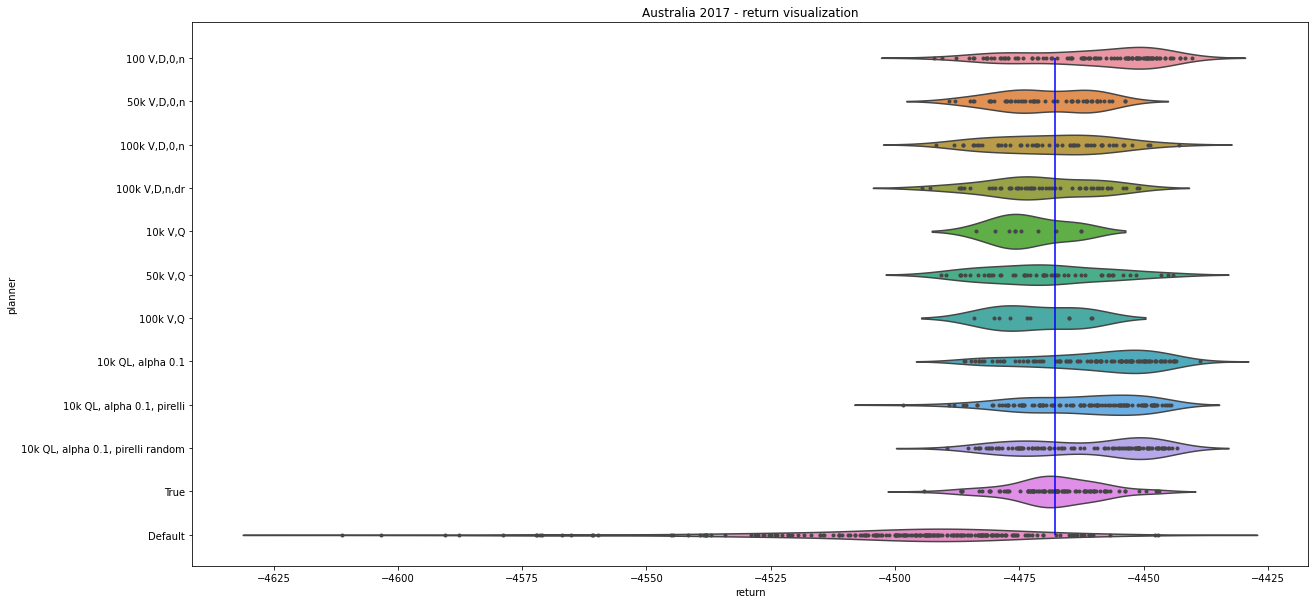

In [7]:
fig = plt.figure(figsize=(20, 10))
plt.title("Australia 2017 - return visualization")
sns.violinplot(x="return", y="planner", data=df, inner="point")
plt.vlines(x=np.mean(true_strategy_scores), ymin=0, ymax=len(df['planner'].unique())-1, colors=['blue'])
plt.savefig("../figures/violin_aus_2017.jpg", bbox_inches='tight')



<Figure size 1080x2160 with 0 Axes>

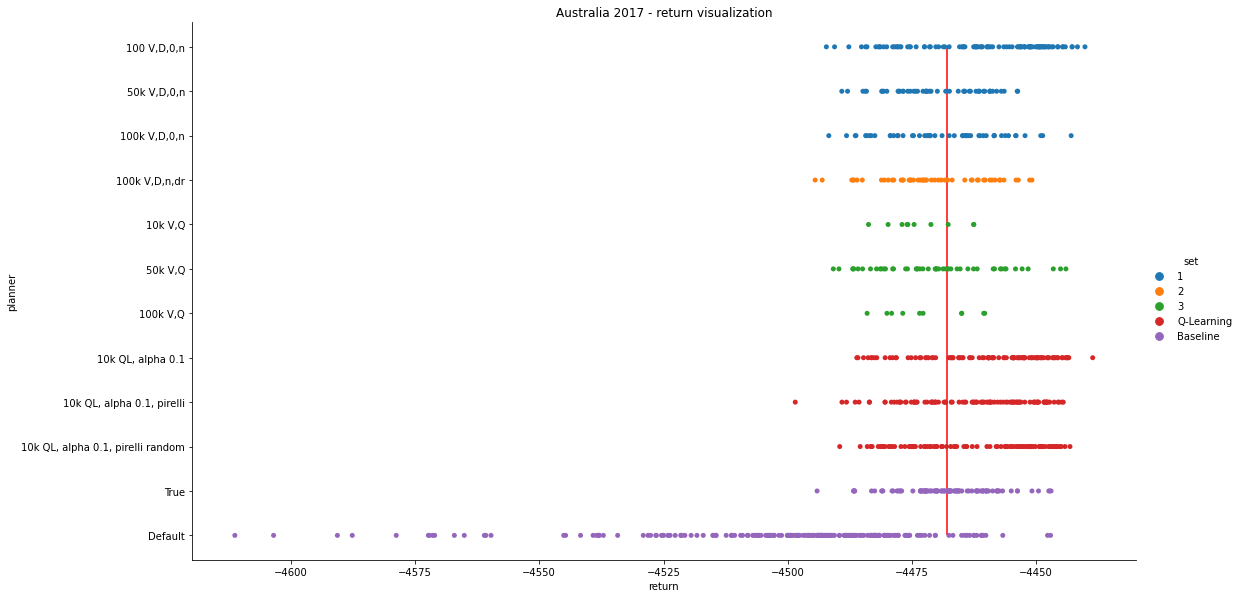

<Figure size 432x288 with 0 Axes>

In [8]:
fig = plt.figure(figsize=(15, 30))
sns.catplot(x="return", y="planner", data=df, jitter=False, hue="set", aspect=2, height=8)
plt.title("Australia 2017 - return visualization")
plt.vlines(x=np.mean(true_strategy_scores), ymin=0, ymax=len(df['planner'].unique())-1, colors=['red'])
plt.show()
plt.savefig("../figures/categorical_aus_2017.jpg", bbox_inches='tight')


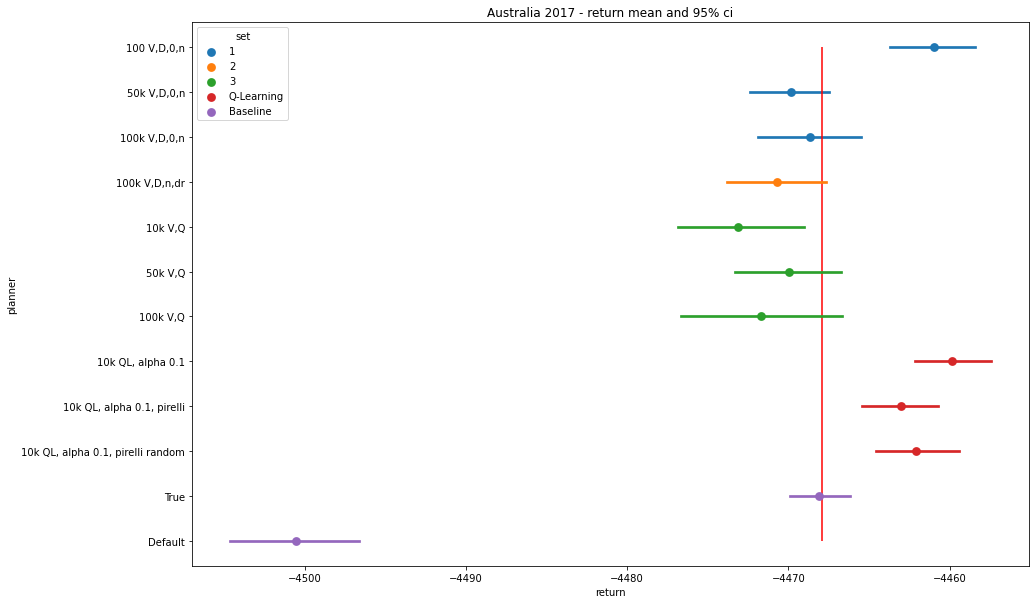

<Figure size 432x288 with 0 Axes>

In [9]:
plt.figure(figsize=(15, 10))
sns.pointplot(x="return", y="planner", join=False, data=df, ci=95, hue="set")
plt.vlines(x=np.mean(true_strategy_scores), ymin=0, ymax=len(df['planner'].unique())-1, colors=['red'])
plt.title("Australia 2017 - return mean and 95% ci")
plt.show()
plt.savefig("../figures/mean95ci_aus_2017.jpg")

In [10]:
ol_uct_offline_scores_1_old = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-10-31_16-31/results.npy")
ol_uct_offline_scores_2_old = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-10-31_16-34/results.npy")
ol_uct_offline_scores_3_old = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-10-31_16-35/results.npy")

In [11]:
fig = plt.figure()
sns.distplot(ol_uct_offline_scores_1, label='budget 50k + sch', hist=False)
sns.distplot(ol_uct_offline_scores_1_old, label='budget 20k', hist=False)
sns.distplot(default_strategy_scores, label='Default', hist=False)
sns.distplot(true_strategy_scores, label='True', hist=False)
plt.title('Return for OL - Australia 2017 - csi=5, c=1')
plt.legend(loc='best')
plt.savefig('../figures/ol_uct_set1_aus_2017_comparison_unnorm')
plt.show()




NameError: name 'ol_uct_offline_scores_1' is not defined

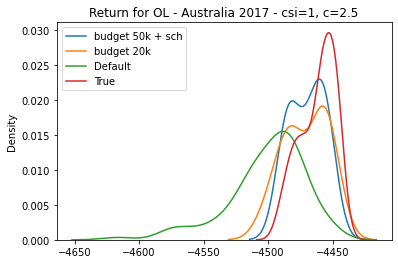

In [5]:
fig = plt.figure()
sns.distplot(ol_uct_offline_scores_2, label='budget 50k + sch', hist=False)
sns.distplot(ol_uct_offline_scores_2_old, label='budget 20k', hist=False)
sns.distplot(default_strategy_scores, label='Default', hist=False)
sns.distplot(true_strategy_scores, label='True', hist=False)
plt.title('Return for OL - Australia 2017 - csi=1, c=2.5')
plt.legend(loc='best')
plt.savefig('../figures/ol_uct_set2_aus_2017_comparison_unnorm')
plt.show()

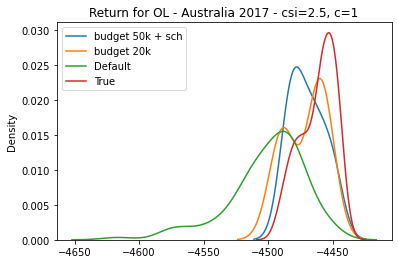

In [6]:
fig = plt.figure()
sns.distplot(ol_uct_offline_scores_3, label='budget 50k + sch', hist=False)
sns.distplot(ol_uct_offline_scores_3_old, label='budget 20k', hist=False)
sns.distplot(default_strategy_scores, label='Default', hist=False)
sns.distplot(true_strategy_scores, label='True', hist=False)
plt.title('Return for OL - Australia 2017 - csi=2.5, c=1')
plt.legend(loc='best')
plt.savefig('../figures/ol_uct_set3_aus_2017_comparison_unnorm')
plt.show()

## csi parameter evaluation

In [23]:
set_1 = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-11-05_16-18-19/results.npy")
set_2 = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-11-05_16-49-22/results.npy")
set_3 = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-11-05_17-20-45/results.npy")
set_4 = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-11-05_17-50-32/results.npy")
set_5 = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-11-05_18-22-30/results.npy")
set_6 = np.load("../logs/RaceStrategy-v2/ol_uct_var/2020-11-05_18-53-59/results.npy")


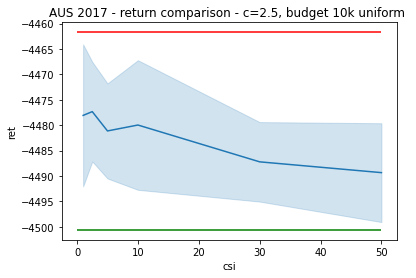

In [36]:
set_list = [set_1, set_2, set_3, set_4, set_5, set_6]
csi_list = [1, 2.5, 5, 10, 30, 50]
df_list = []
for s, csi in zip(set_list, csi_list):
    df_list.append(pd.DataFrame({"ret": s, "csi": csi}))
df = pd.concat(df_list)

plt.figure()
plt.title("AUS 2017 - return comparison - c=2.5, budget 10k uniform ")
sns.lineplot(x="csi", y="ret", data=df, ci="sd")
plt.hlines(y=[np.mean(true_strategy_scores), np.mean(default_strategy_scores)], xmin=[0,0], xmax=[50,50], colors=["red", "green"])
plt.savefig("../figures/ol_uct_csi_comparison_AUS_2017_10000b_uniform")


## TRPO return distribution

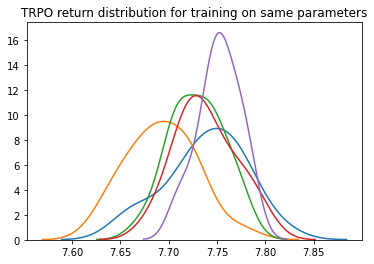

In [3]:
trpo_logs_folder = "../data/RaceStrategy-v2/trpo_2_32_0.001_201e/logs/"
training_scores = []

for dir in os.scandir(trpo_logs_folder):
    training_scores.append(np.load(dir.path + "/final_evaluation_scores.npy", allow_pickle=True))

plt.figure()
for data in training_scores:
    sns.distplot(data, hist=False)
plt.title("TRPO return distribution for training on same parameters")
plt.savefig('../logs/RaceStrategy-v2/trpo/return_2x32_5tr.png')
plt.show()

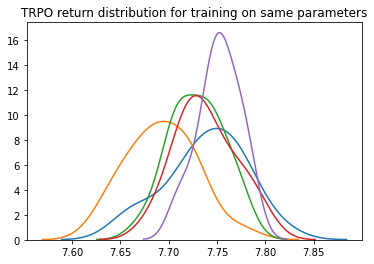

In [9]:
trpo_logs_folder = "../data/RaceStrategy-v2/trpo_2_32_0.001_201e/logs/"
training_scores = []

for dir in os.scandir(trpo_logs_folder):
    training_scores.append(np.load(dir.path + "/final_evaluation_scores.npy", allow_pickle=True))

plt.figure()
for data in training_scores:
    sns.distplot(data, hist=False)
plt.title("TRPO return distribution for training on same parameters")
plt.savefig('../logs/RaceStrategy-v2/trpo/return_2x32_5tr.png')
plt.show()

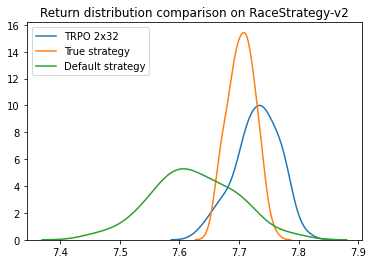

In [10]:
full_scores = np.hstack(training_scores)
plt.figure()
plt.title("Return distribution comparison on RaceStrategy-v2")
sns.distplot(full_scores, hist=False, label="TRPO 2x32")
sns.distplot(true_strategy_scores, hist=False, label="True strategy")
sns.distplot(default_strategy_scores, hist=False, label = "Default strategy")
plt.savefig('../logs/RaceStrategy-v2/trpo/return_comparison_2x32_5tr.png')
plt.show()

## TRPO training curves

[array([7.50119862, 7.49782298, 7.50831369, 7.51434924, 7.4995782 ,
       7.50735866, 7.50477166, 7.49736818, 7.50685504, 7.51087755,
       7.50935678, 7.50016438, 7.51253863, 7.49200684, 7.505911  ,
       7.52012773, 7.51325715, 7.49534052, 7.51132003, 7.50435738,
       7.50390335, 7.50454457, 7.50963123, 7.50690953, 7.52124046,
       7.51153791, 7.50198579, 7.49951297, 7.49403015, 7.50457377,
       7.51507311, 7.51213507, 7.49625036, 7.51036115, 7.50320857,
       7.51648955, 7.52423067, 7.5072741 , 7.49972709, 7.51222246,
       7.50942443, 7.50433333, 7.52483394, 7.51045331, 7.51386529,
       7.51066544, 7.50989436, 7.50994004, 7.51637092, 7.50846557,
       7.51694505, 7.50550895, 7.51318934, 7.5049642 , 7.50565835,
       7.51308725, 7.50716116, 7.50277033, 7.52106597, 7.5206327 ,
       7.50540066, 7.50656701, 7.51488545, 7.52608663, 7.50375473,
       7.50432677, 7.51778779, 7.50837407, 7.52116801, 7.51037597,
       7.52896206, 7.51508284, 7.51631723, 7.50786711, 7.5122

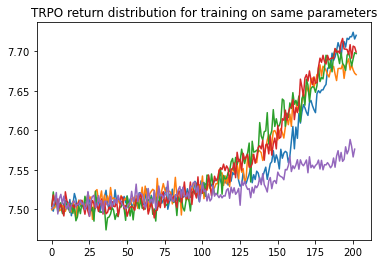

In [6]:
training_data_path = "../data/RaceStrategy-v2/trpo_2_32_0.001/models"

online_scores = []

for dir in os.scandir(training_data_path):
    online_scores.append(np.load(dir.path + "/online_scores.npy", allow_pickle=True))

plt.figure()
print(online_scores)
for data in online_scores:
    sns.lineplot(data=data)
plt.title("TRPO return distribution for training on same parameters")
plt.savefig('../logs/RaceStrategy-v2/trpo/return_2x32_5tr.png')
plt.show()